In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import wordnet as wn

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from textblob import *

In [4]:
trump=pd.read_csv('./trump_comm.csv',encoding='ISO-8859-1',index_col=0)
trump.head()

,Post,Comment
Topic,,
United States presidential election 2016,Former Mexican president slams Trump's 'stupid...,How can any intelligent person believe that Do...
United States presidential election 2016,Former Mexican president slams Trump's 'stupid...,Pay for the wall or their transport back home.
United States presidential election 2016,Former Mexican president slams Trump's 'stupid...,would he pay for a smart wall though?
United States presidential election 2016,Former Mexican president slams Trump's 'stupid...,Hillary thinks saying 'everybody accepts big m...
United States presidential election 2016,Former Mexican president slams Trump's 'stupid...,Seriously should charge other countries for ch...


In [5]:
import re
trump['Comment'] = [re.sub('(\\W|\\d)', " ",str(text)) for text in trump['Comment']]

In [6]:
def get_tweet_sentiment(text): 
    
    analysis = TextBlob(text) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return('positive')
    elif analysis.sentiment.polarity == 0: 
        return ('neutral')
    else: 
        return ('negative')

In [7]:
trump['Sentiment'] = list(map(get_tweet_sentiment,trump['Comment']))

In [8]:
trump.Sentiment.value_counts()

positive    42
neutral     42
negative    15
Name: Sentiment, dtype: int64

In [9]:
trump.head()

,Post,Comment,Sentiment
Topic,,,
United States presidential election 2016,Former Mexican president slams Trump's 'stupid...,How can any intelligent person believe that Do...,positive
United States presidential election 2016,Former Mexican president slams Trump's 'stupid...,Pay for the wall or their transport back home,neutral
United States presidential election 2016,Former Mexican president slams Trump's 'stupid...,would he pay for a smart wall though,positive
United States presidential election 2016,Former Mexican president slams Trump's 'stupid...,Hillary thinks saying everybody accepts big m...,positive
United States presidential election 2016,Former Mexican president slams Trump's 'stupid...,Seriously should charge other countries for ch...,negative


In [10]:
trump = trump[['Comment','Sentiment']]

In [11]:
trump.shape

(99, 2)

In [12]:
trump.isnull().sum()

Comment      0
Sentiment    0
dtype: int64

In [13]:
trump.dropna(inplace=True)

In [14]:
trump.dtypes

Comment      object
Sentiment    object
dtype: object

In [15]:
trump['Sentiment']=trump['Sentiment'].astype("category")

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm

In [17]:
train_X, test_X, train_y, test_y = train_test_split(trump['Comment'],trump['Sentiment'],test_size=0.3,random_state=523)

In [18]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

Tfidf_vect = TfidfVectorizer(min_df=5,max_df=0.8,sublinear_tf=True,use_idf=True)
Tfidf_vect.fit(train_X)
train_X_Tfidf = Tfidf_vect.transform(train_X)
test_X_Tfidf = Tfidf_vect.transform(test_X)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BIBEKSINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
print(train_X_Tfidf)

  (0, 37)	1.0
  (1, 43)	0.5102877389030758
  (1, 38)	0.5102877389030758
  (1, 23)	0.36435745541740866
  (1, 19)	0.37318909394794875
  (1, 12)	0.45517731917400406
  (2, 42)	0.3389188206379056
  (2, 31)	0.3552797323411173
  (2, 17)	0.38383942009446687
  (2, 15)	0.40651445952350207
  (2, 2)	0.43333333890631603
  (2, 1)	0.5084740465128949
  (3, 42)	0.3577358838446889
  (3, 32)	0.297530042869974
  (3, 27)	0.405150513457704
  (3, 19)	0.7869904525752581
  (4, 46)	0.4599922752025001
  (4, 45)	0.4249885758575888
  (4, 42)	0.3209146934037814
  (4, 39)	0.2146588401338034
  (4, 36)	0.17031965002234703
  (4, 31)	0.19868708442875152
  (4, 27)	0.36344900995481727
  (4, 25)	0.25100509910605623
  (4, 17)	0.2146588401338034
  :	:
  (63, 13)	0.4666183428470576
  (63, 8)	0.2327243163355641
  (63, 0)	0.29745225029631406
  (65, 45)	0.36983683407616635
  (65, 40)	0.3349676144666239
  (65, 39)	0.3162833987209317
  (65, 32)	0.23226877433125584
  (65, 31)	0.2927502371013804
  (65, 20)	0.41898223885629976
  (65,

In [20]:
Dense_mat = train_X_Tfidf.todense()
Tfidf_Mat = pd.DataFrame(Dense_mat, columns=Tfidf_vect.get_feature_names())
# Tfidf_Mat.shape
Tfidf_Mat.head()

,and,any,be,can,country,for,former,from,get,going,...,trump,us,wall,we,what,will,with,would,you,your
0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.510288,0.000000,0.0,0.0,0.000000,0.510288,0.0,0.000000,0.000000
2,0.000000,0.508474,0.433333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.338919,0.000000,0.0,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.357736,0.000000,0.0,0.000000,0.000000
4,0.214659,0.000000,0.000000,0.0,0.0,0.320915,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.214659,0.0,0.0,0.320915,0.000000,0.0,0.424989,0.459992


In [21]:
from sklearn.metrics import classification_report,accuracy_score, recall_score, precision_score

In [22]:
acc_dict_train = {}
acc_dict_test = {}

In [23]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(kernel='linear')
SVM.fit(train_X_Tfidf,train_y)

# predict the labels on train dataset
pred_train1 = SVM.predict(train_X_Tfidf)

# predict the labels on validation dataset
pred_test1 = SVM.predict(test_X_Tfidf)

# Use accuracy_score function to get the accuracy
train_rmse1 = accuracy_score(train_y, pred_train1)*100
test_rmse1 = accuracy_score(test_y, pred_test1)*100
print("SVM Accuracy Score on Train set -> ", train_rmse1)
print("SVM Accuracy Score on Validation set -> ", test_rmse1)

acc_dict_test['SVM'] = accuracy_score(test_y, pred_test1)*100
acc_dict_train['SVM'] = accuracy_score(train_y, pred_train1)*100

SVM Accuracy Score on Train set ->  82.6086956521739
SVM Accuracy Score on Validation set ->  50.0


In [24]:
print(classification_report(test_y,pred_test1))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         6
     neutral       0.50      0.77      0.61        13
    positive       0.56      0.45      0.50        11

    accuracy                           0.50        30
   macro avg       0.35      0.41      0.37        30
weighted avg       0.42      0.50      0.45        30



In [25]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [26]:
metric = defaultdict(list)
metric['SVM'].append(precision_score(train_y, pred_train1,average='macro'))
metric['SVM'].append(recall_score(train_y, pred_train1,average='macro'))
metric['SVM'].append(f1_score(train_y, pred_train1,average='macro'))

In [27]:
# Classifier - Algorithm - Random Forest Algorithm

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
Rforest = RandomForestClassifier(n_estimators=100)

# fit the training dataset on the classifier
Rforest.fit(train_X_Tfidf,train_y)

# predict the labels on train dataset
pred_train1 = Rforest.predict(train_X_Tfidf)

# predict the labels on validation dataset
pred_test1 = Rforest.predict(test_X_Tfidf)

train_rmse2=accuracy_score(train_y, pred_train1)*100
test_rmse2 =accuracy_score(test_y, pred_test1)*100


# Use accuracy_score function to get the accuracy
print("RandomForest Accuracy Score on Train set -> ",train_rmse2 )
print("RandomForest Accuracy Score on Validation set -> ",test_rmse2)

acc_dict_test['RF'] = accuracy_score(test_y, pred_test1)*100
acc_dict_train['RF'] = accuracy_score(train_y, pred_train1)*100

RandomForest Accuracy Score on Train set ->  97.10144927536231
RandomForest Accuracy Score on Validation set ->  56.666666666666664


In [28]:
print(classification_report(test_y,pred_test1))

              precision    recall  f1-score   support

    negative       0.50      0.17      0.25         6
     neutral       0.62      0.77      0.69        13
    positive       0.50      0.55      0.52        11

    accuracy                           0.57        30
   macro avg       0.54      0.49      0.49        30
weighted avg       0.55      0.57      0.54        30



In [29]:
metric['RF'].append(precision_score(train_y, pred_train1,average='macro'))
metric['RF'].append(recall_score(train_y, pred_train1,average='macro'))
metric['RF'].append(f1_score(train_y, pred_train1,average='macro'))

In [30]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(train_X_Tfidf,train_y)

# predict the labels on train dataset
pred_train = Naive.predict(train_X_Tfidf)

# predict the labels on validation dataset
pred_test = Naive.predict(test_X_Tfidf)

train_rmse3=accuracy_score(train_y, pred_train)*100
test_rmse3=accuracy_score(test_y, pred_test)*100



# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score on Train set -> ", train_rmse3)
print("Naive Bayes Accuracy Score on Validation set -> ",test_rmse3)

acc_dict_test['NB'] = accuracy_score(test_y, pred_test)*100
acc_dict_train['NB'] = accuracy_score(train_y, pred_train)*100

Naive Bayes Accuracy Score on Train set ->  78.26086956521739
Naive Bayes Accuracy Score on Validation set ->  46.666666666666664


In [31]:
print(classification_report(test_y,pred_test1))

              precision    recall  f1-score   support

    negative       0.50      0.17      0.25         6
     neutral       0.62      0.77      0.69        13
    positive       0.50      0.55      0.52        11

    accuracy                           0.57        30
   macro avg       0.54      0.49      0.49        30
weighted avg       0.55      0.57      0.54        30



In [32]:
metric['NB'].append(precision_score(train_y, pred_train,average='macro'))
metric['NB'].append(recall_score(train_y, pred_train,average='macro'))
metric['NB'].append(f1_score(train_y, pred_train,average='macro'))

In [33]:
# Logistic Regression Algorithm
# fit the training dataset on the classifier
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(train_X_Tfidf,train_y)

clf.score(train_X_Tfidf,train_y)

# predict the labels on train dataset
pred_train1 = clf.predict(train_X_Tfidf)

# predict the labels on validation dataset
pred_test1 = clf.predict(test_X_Tfidf)

train_rmse4=accuracy_score(train_y, pred_train1)*100
test_rmse4=accuracy_score(test_y, pred_test1)*100

# Use accuracy_score function to get the accuracy
print("Logistic Regression Accuracy Score on Train set -> ",train_rmse4 )
print("Logistic Regression Accuracy Score on Validation set -> ",test_rmse4)

acc_dict_test['LG'] = accuracy_score(test_y, pred_test1)*100
acc_dict_train['LG'] = accuracy_score(train_y, pred_train1)*100


Logistic Regression Accuracy Score on Train set ->  84.05797101449275
Logistic Regression Accuracy Score on Validation set ->  53.333333333333336


In [34]:
print(classification_report(test_y,pred_test1))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         6
     neutral       0.55      0.85      0.67        13
    positive       0.50      0.45      0.48        11

    accuracy                           0.53        30
   macro avg       0.35      0.43      0.38        30
weighted avg       0.42      0.53      0.46        30



In [35]:
metric['LG'].append(precision_score(train_y, pred_train1,average='macro'))
metric['LG'].append(recall_score(train_y, pred_train1,average='macro'))
metric['LG'].append(f1_score(train_y, pred_train1,average='macro'))

In [36]:
# Classifier - Algorithm - Decision Tree
# fit the training dataset on the classifier
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier(random_state=0)
Dtree.fit(train_X_Tfidf,train_y)

# predict the labels on train dataset
pred_train1 = Dtree.predict(train_X_Tfidf)

# predict the labels on validation dataset
pred_test1 = Dtree.predict(test_X_Tfidf)

train_rmse5=accuracy_score(train_y, pred_train1)*100
test_rmse5=accuracy_score(test_y, pred_test1)*100

# Use accuracy_score function to get the accuracy
print("Decision tree Accuracy Score on Train set -> ",train_rmse5 )
print("Decision tree Accuracy Score on Validation set -> ",test_rmse5)

acc_dict_test['DT'] = accuracy_score(test_y, pred_test1)*100
acc_dict_train['DT'] = accuracy_score(train_y, pred_train1)*100

Decision tree Accuracy Score on Train set ->  97.10144927536231
Decision tree Accuracy Score on Validation set ->  46.666666666666664


In [37]:
print(classification_report(test_y,pred_test1))

              precision    recall  f1-score   support

    negative       0.50      0.33      0.40         6
     neutral       0.50      0.69      0.58        13
    positive       0.38      0.27      0.32        11

    accuracy                           0.47        30
   macro avg       0.46      0.43      0.43        30
weighted avg       0.45      0.47      0.45        30



In [38]:
metric['DT'].append(precision_score(train_y, pred_train1,average='macro'))
metric['DT'].append(recall_score(train_y, pred_train1,average='macro'))
metric['DT'].append(f1_score(train_y, pred_train1,average='macro'))

In [39]:
tmp = pd.DataFrame(dict(metric),index=['precision','recall','f1'])

In [40]:
import matplotlib.pyplot as plt

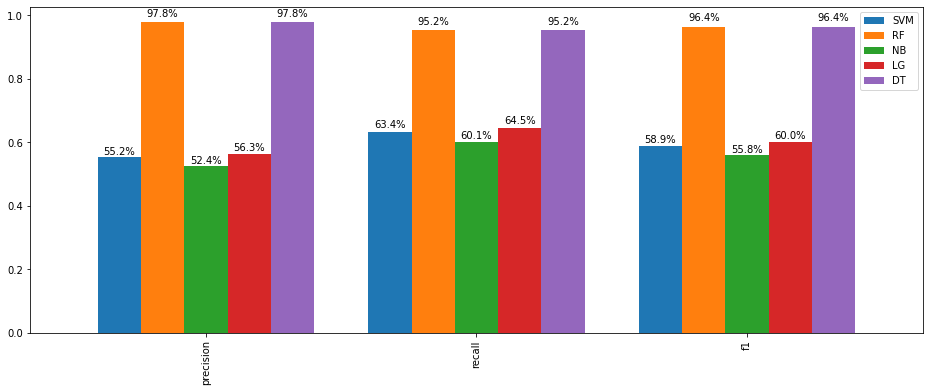

In [41]:
## Visualization and comparison of metrics for all the models or algorithms
ax=tmp.plot(kind='bar',figsize=(16,6),width=0.8)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height*100:.3}%', (x + width/2, y + height*1.02), ha='center')
plt.show()

In [42]:
## RMSE evaluation
from sklearn.metrics import mean_squared_error
var1 =(mean_squared_error([train_rmse1],[test_rmse1]))
var2 =(mean_squared_error([train_rmse2],[test_rmse2]))
var3 =(mean_squared_error([train_rmse3],[test_rmse3]))
var4 = (mean_squared_error([train_rmse4],[test_rmse4]))
var5 = (mean_squared_error([train_rmse4],[test_rmse4]))
var1=np.sqrt(var1)
var2=np.sqrt(var2)
var3=np.sqrt(var3)
var4=np.sqrt(var4)
var5=np.sqrt(var5)
print("RMSE of SVM",var1)
print("RMSE of Random Forest",var2)
print("RMSE of Naive Bayes",var3)
print("RMSE of Logistic Regression",var4)
print("RMSE of Decision Tree",var4)

RMSE of SVM 32.60869565217391
RMSE of Random Forest 40.43478260869565
RMSE of Naive Bayes 31.594202898550726
RMSE of Logistic Regression 30.724637681159415
RMSE of Decision Tree 30.724637681159415


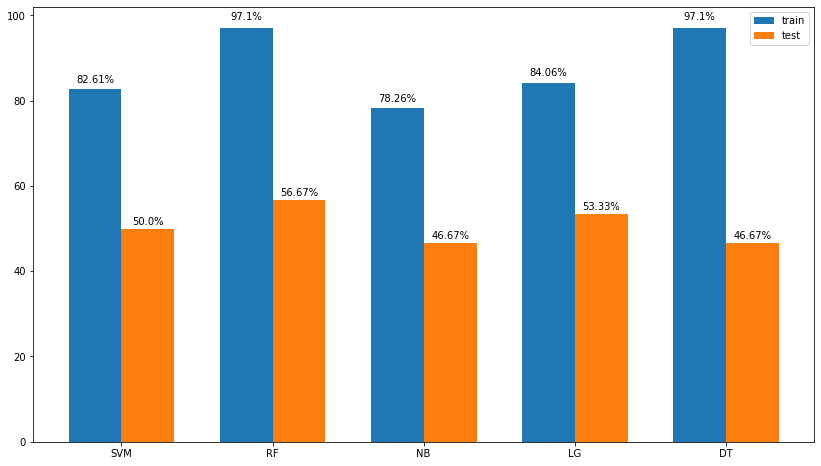

In [43]:
## Bar plot of accuracy of different models trained above.
x = np.arange(5)  # the label locations
width = 0.35
fig,ax = plt.subplots(figsize=(14,8))

#ax = plt.subplot(121)

br = ax.bar(x-width/2,list(acc_dict_train.values()),width, label='train')
br2 = ax.bar(x+width/2,list(acc_dict_test.values()),width, label='test')
ax.set_xticks((0,1,2,3,4))
ax.set_xticklabels(['SVM','RF','NB','LG','DT'])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.4}%', (x + width/2, y + height*1.02), ha='center')
ax.legend(loc='upper right')
#fig.tight_layout()
plt.show()